# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:red">  Numerical exercises 12: Deep and Convolutional Neural Networks</span>

$\textbf{12.1 Choosing optimizers}$

In this exercise I've explored different types of optimizers for the deep neural network which was already given. Keeping fixed all the other parameters in the DNN, I've tried *Adagrad*, *Adam*, *Adadelta* and *SGD*: the optimizer with worst accuracy is the *SGD*, while the other three have similar accuracy, of about 97-98%.

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)

/home/matteo/.conda/envs/intelpython3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Using TensorFlow backend.


X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [3]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255


# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [4]:
# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
keras.utils.to_categorical(labels)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [6]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [7]:
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 30s 497us/step - loss: 0.2853 - acc: 0.9150 - val_loss: 0.1188 - val_acc: 0.9619
Epoch 2/5
60000/60000 [==============================] - 21s 348us/step - loss: 0.1223 - acc: 0.9644 - val_loss: 0.0862 - val_acc: 0.9722
Epoch 3/5
60000/60000 [==============================] - 21s 342us/step - loss: 0.0871 - acc: 0.9747 - val_loss: 0.0764 - val_acc: 0.9776
Epoch 4/5
60000/60000 [==============================] - 32s 529us/step - loss: 0.0708 - acc: 0.9791 - val_loss: 0.0844 - val_acc: 0.9760
Epoch 5/5
60000/60000 [==============================] - 30s 494us/step - loss: 0.0569 - acc: 0.9827 - val_loss: 0.0790 - val_acc: 0.9780


10000/10000 [==============================] - 1s 84us/step

Test loss: 0.07904474927352276
Test accuracy: 0.978


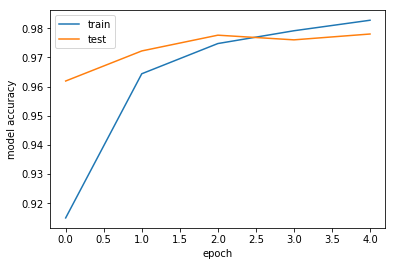

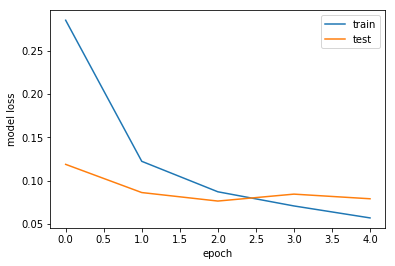

In [8]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

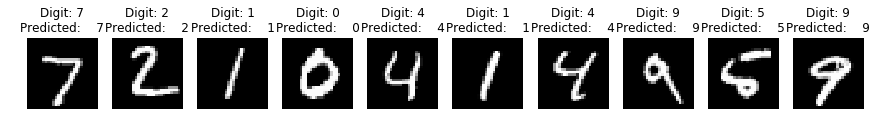

In [9]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

In [10]:
#this cell is commented because it serves only to store the NN in the Saved directory

#save_model_path ='Saved/DNN_Adam.mod'
#model_DNN.save(filepath=save_model_path,include_optimizer=True)

$\textbf{12.2 Convolutional Neural Networks}$

In this exercise I've developed a convolutional neural network that has to recognize images of digits (from 0 to 9, of 28x28 pixel dimension).

I've chosen the *Adagrad* optimizer, and set the layers as follows:
- conv2D input layer, with *relu* activation function
- classic Dense layer, with 30 neurons and *tanh* activation function
- MaxPooling2D layer, with pool size (4,4)
- classic Dense layer, with 30 neurons and *tanh* activation function
- Dropout layer with 0.5 drop rate
- Flatten layer
- Dense output layer with num_classes = 10 outputs and *softmax* activation function

I've set 4 epochs of training, because they are enough to reach a 95% accuracy.  
The CNN I've constructed recognizes a good number of the images passed to it, but not them all.

In [11]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)

In [12]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten, Conv2D, MaxPooling2D

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Dense(30, activation='tanh'))
    model.add(MaxPooling2D(pool_size=(4,4)))
    model.add(Dense(30, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))
    
    
    
    #
    # ADD HERE SOME OTHER LAYERS AT YOUR WILL, FOR EXAMPLE SOME: Dropout, 2D pooling, 2D convolutional etc. ... 
    # remember to move towards a standard flat layer in the final part of your DNN,
    # and that we need a soft-max layer with num_classes=10 possible outputs
    #
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adagrad',
                  metrics=['accuracy'])
    return model

In [14]:
# training parameters
batch_size = 32
epochs = 4

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 70s 1ms/step - loss: 0.3207 - acc: 0.8992 - val_loss: 0.1534 - val_acc: 0.9543
Epoch 2/4
60000/60000 [==============================] - 68s 1ms/step - loss: 0.1828 - acc: 0.9435 - val_loss: 0.1224 - val_acc: 0.9642
Epoch 3/4
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1576 - acc: 0.9506 - val_loss: 0.1083 - val_acc: 0.9668
Epoch 4/4
60000/60000 [==============================] - 68s 1ms/step - loss: 0.1398 - acc: 0.9562 - val_loss: 0.1015 - val_acc: 0.9672


10000/10000 [==============================] - 4s 407us/step

Test loss: 0.10145695120878517
Test accuracy: 0.9672


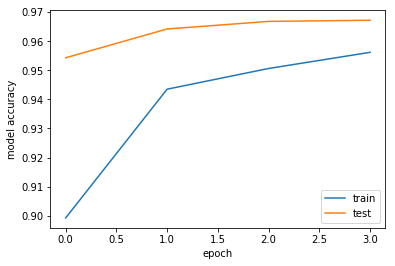

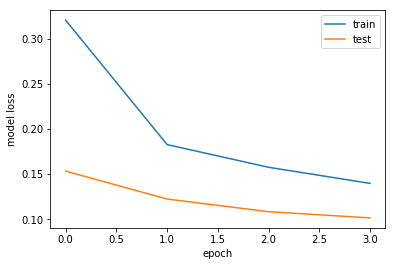

In [15]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

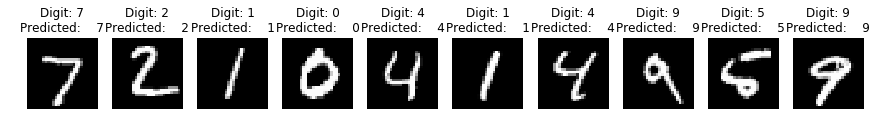

In [16]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

In [17]:
#this cell is commented because it serves only to store the NN in the Saved directory

#save_model_path ='Saved/CNN_Adagrad.mod'
#model_CNN.save(filepath=save_model_path,include_optimizer=True)

$\textbf{12.3 My digits}$

The task of this exercise was to use the CNN constructed in the previous exercise to recognize 10 handwritten digits produced using the gimp app. Unfortunately I've not succeeded in creating a good enough CNN, because the digits I've created aren't well recognized by the NN.

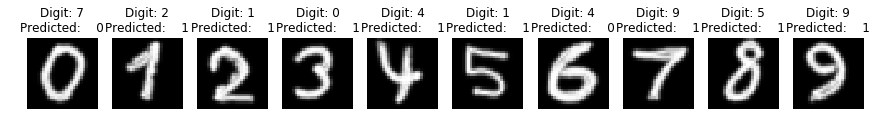

In [18]:
from PIL import Image
import os

#CNN = load_model('Saved/CNN_Adagrad.mod')

numbers = np.zeros((10, 28, 28))

for k in range (0,10):
    digit_filename = "Numbers/" +str(k) + ".png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]
    data /= 255
    for j in range(ydim):
        for i in range(xdim):
            numbers[k,i,j]=data[i,j]
    

if keras.backend.image_data_format() == 'channels_first':
    numbers = numbers.reshape(numbers.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    numbers = numbers.reshape(numbers.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


pred = model_CNN.predict(numbers)

numbers = numbers.reshape(numbers.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(numbers[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(pred[i])))    
    plt.axis('off') 
plt.show()